# Capstone Project-Telcom Customer Churn Prediction 

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Modeling
- Evaluation
- Choose best model

### 1) Problem statement
- this project is about Telco Customer Churn prediction. Understanding how the customer churn is affected by other variables such as Gender, Income, Services, and many other factors.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The raw data contains 7043 rows (customers) and 21 columns (features).

- The “Churn” column is our target.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#### Show Top 5 Records

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Shape of the Dataset

In [12]:
df.shape

(7043, 21)

### 2.2 Dataset information

- customerID: Customer's Id for unique identifier of each record
- gender: Customer Gender like Male/Female
- SeniorCitizen: Defines weather the person is senior citizen or no. 0 means No, 1 means Yes
- Partner: Whether the customer has a partner or not (Yes, No). 
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check missing values

In [16]:
df.isnull().sum() # checking for null values in the dataset.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There is no missing values in the dataset

#### 3.2 Check for Duplicate values. 

In [19]:
df.duplicated().sum()

np.int64(0)

##### No Duplicates found

#### 3.3 Check Data Types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### So we have 2 numerical features and 17(+1 gender is categorical but is in numerical form) categorical features out of total 20. 

#### 3.4 Checking or unique values of each columns

In [25]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- Need to convert some columns to integer. for eg: TotalCharges column holds numerical values but is assigned as object data type.
- We will be dropping the CustomerID column because it is not required for the analysis as it is just unique identifier for each record.
- we will have to encode the categorical features.
- The target variable Churn will be converted into numerical as well. 

#### Changing the column names to standardize the naming. 

In [28]:
import re

def col_format(name):
    return re.sub(r'(?<!^)([A-Z])', r'_\1', name).lower()

# Rename columns
df.columns = [col_format(col) for col in df.columns]

# Print updated column names
print(df.columns)

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')


In [29]:
print(df[~df["total_charges"].str.replace(" ", "").str.isnumeric()])

     customer_i_d  gender  senior_citizen partner dependents  tenure  \
0      7590-VHVEG  Female               0     Yes         No       1   
1      5575-GNVDE    Male               0      No         No      34   
2      3668-QPYBK    Male               0      No         No       2   
3      7795-CFOCW    Male               0      No         No      45   
4      9237-HQITU  Female               0      No         No       2   
...           ...     ...             ...     ...        ...     ...   
7038   6840-RESVB    Male               0     Yes        Yes      24   
7039   2234-XADUH  Female               0     Yes        Yes      72   
7040   4801-JZAZL  Female               0     Yes        Yes      11   
7041   8361-LTMKD    Male               1     Yes         No       4   
7042   3186-AJIEK    Male               0      No         No      66   

     phone_service    multiple_lines internet_service online_security  ...  \
0               No  No phone service              DSL    

- Converts values to numeric.
- If there are non-numeric values, it replaces them with NaN instead of raising an error.
- If NaN values are introduced after conversion, you can replace them with 0s. 

In [31]:
# Converts the Total_charges column to numeric
df["total_charges"] = pd.to_numeric(df["total_charges"], errors="coerce")

# if there are any nan values then they will be replaced with 0. 
df["total_charges"].fillna(0, inplace=True)  # Replace NaN with 0 (or any default value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_i_d       7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_t_v      7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

### 3.5 Check statistics of data set

In [33]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Insights
- total_charges has a mean of 2279.73 and a max of 8684.80, which makes sense as it represents cumulative charges over time.
- tenure ranges from 0 to 72 months, meaning the dataset covers up to 6 years of customer data.
- The standard deviations (especially for total_charges) indicate significant variation among customers, which could be useful for customer segmentation or churn prediction analysis.

#### 3.7 EDA (Exploratory Data Analysis)

In [36]:
for col in df.select_dtypes(include=["object"]).columns:  # Select categorical columns
    print(f"Column: {col}")
    print(df[col].unique())  # Print unique values
    print("-" * 40)  # Separator for better readability

Column: customer_i_d
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------
Column: partner
['Yes' 'No']
----------------------------------------
Column: dependents
['No' 'Yes']
----------------------------------------
Column: phone_service
['No' 'Yes']
----------------------------------------
Column: multiple_lines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: internet_service
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: online_security
['No' 'Yes' 'No internet service']
----------------------------------------
Column: online_backup
['Yes' 'No' 'No internet service']
----------------------------------------
Column: device_protection
['No' 'Yes' 'No internet service']
----------------------------------------
Column: tech_support
['No' 'Yes' 'No internet service']
---------------

In [37]:
df['senior_citizen'].value_counts()

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

#### Total 5901 customers are not senior citizens while 1142 are Senior Citizen

In [39]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

We have 17 categorical features : ['customer_i_d', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']


- Senior_citizen column is categorical, but its already converted to numeric so we dont need to convert it later. 

In [41]:
df.head(5)

,customer_i_d,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### Univariate analysis

#### Numerical Columns

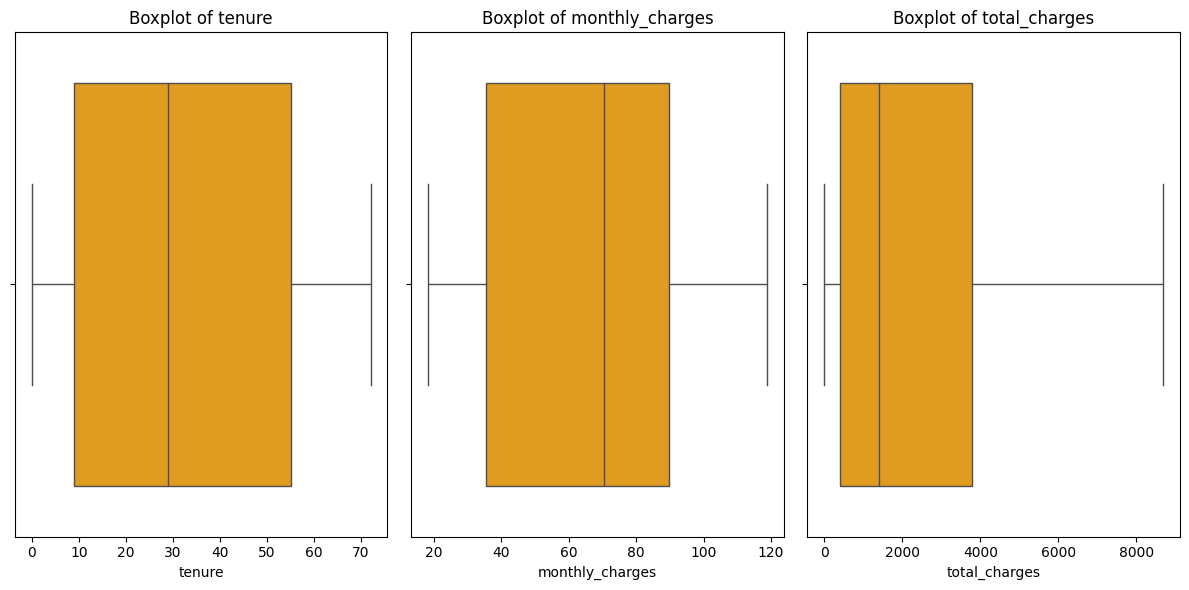

In [45]:
# Define numerical columns
num_cols = ["tenure", "monthly_charges", "total_charges"]

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

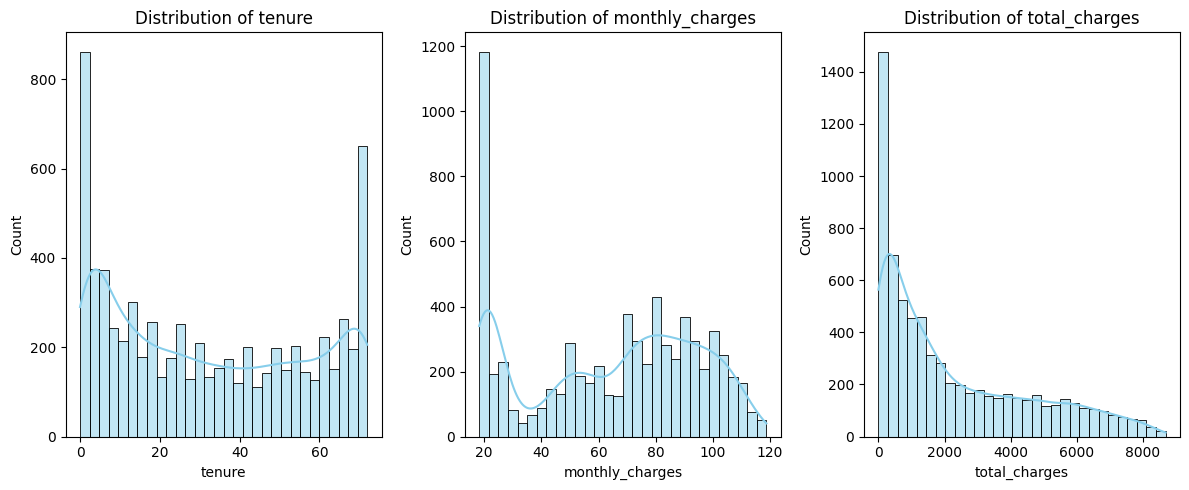

In [46]:
num_cols = ["tenure", "monthly_charges", "total_charges"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


- The distribution looks uneven and its not a normal distrbution. we need to use Normalization Technique here to normaliz the data. 

#### Categorical Column Counts

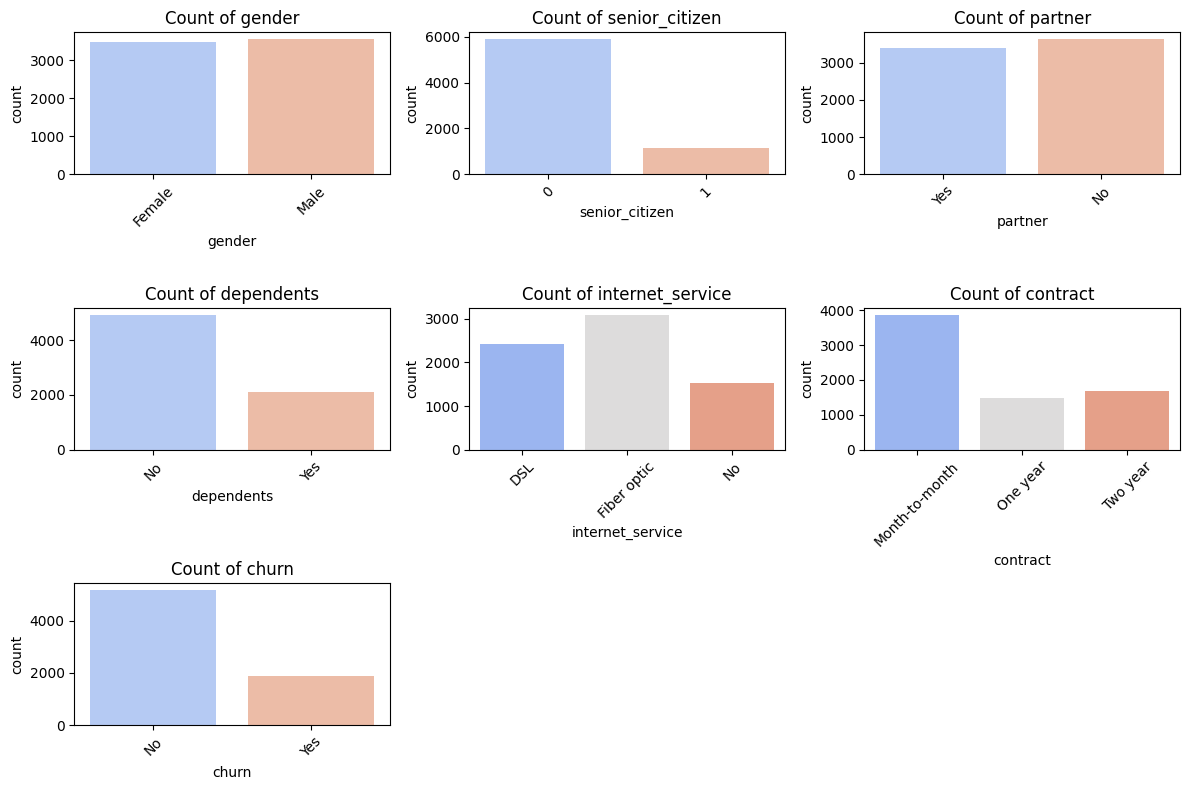

In [49]:
cat_cols = ["gender", "senior_citizen", "partner", "dependents", "internet_service", "contract", "churn"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

- There is some imbalance in Sensior_citizen column, count_of_dependents, and Churn columns.
- rest other columns looks pretty much balanced. 

#### Bivariate analysis

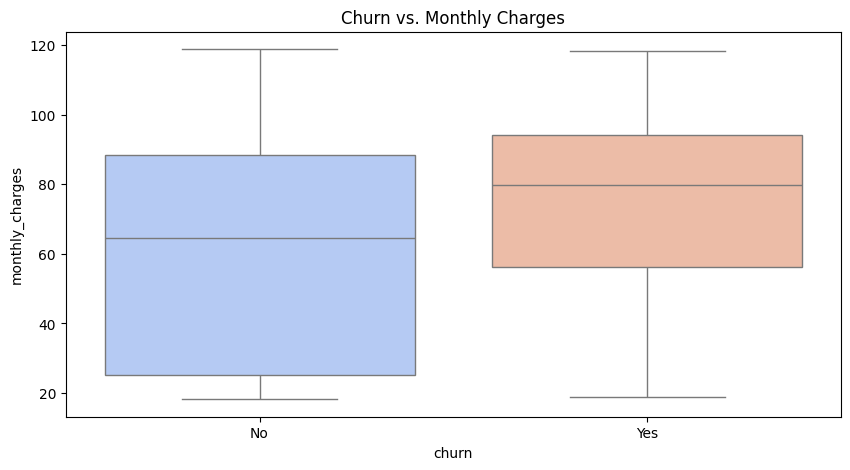

In [52]:
# Churn Vs Other Features:
plt.figure(figsize=(10, 5))
sns.boxplot(x="churn", y="monthly_charges", data=df, palette="coolwarm")
plt.title("Churn vs. Monthly Charges")
plt.show()

- customer with monthly_charges higher monthly charges are higher corelating to churn

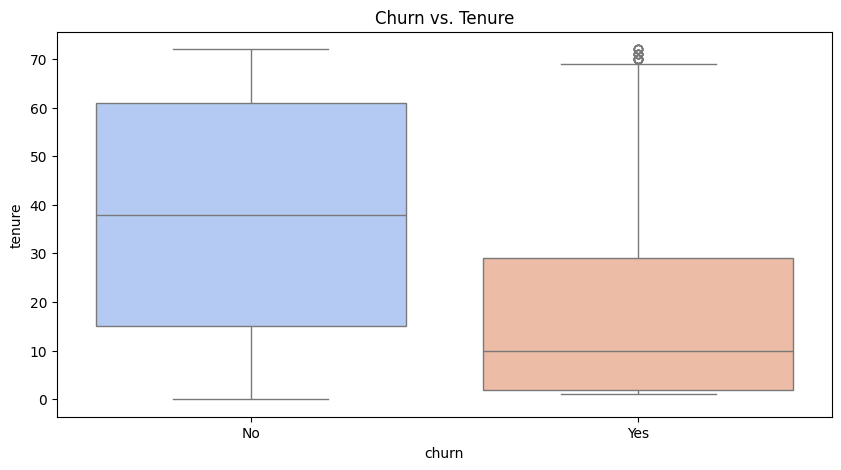

In [54]:
# Tenure Vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x="churn", y="tenure", data=df, palette="coolwarm")
plt.title("Churn vs. Tenure")
plt.show()

- Customer with lower tenure may likely to churn while there are some exceptions

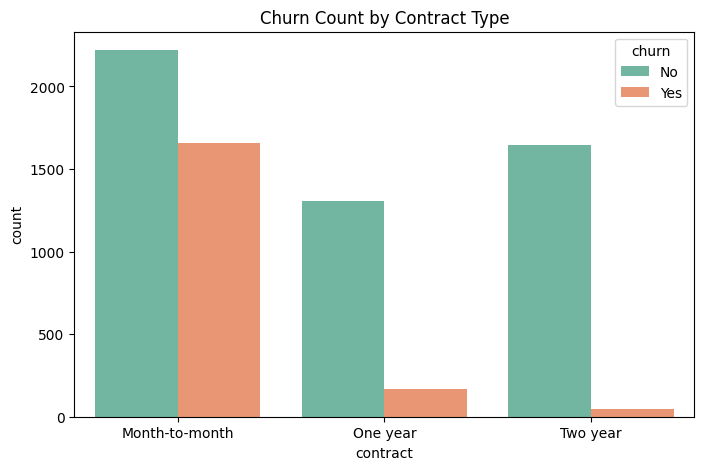

In [56]:
# contract Type Vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="contract", hue="churn", palette="Set2")
plt.title("Churn Count by Contract Type")
plt.show()

- Customer with month-to-month have higher number of subscriptions but are most likely to churn. 
- customer on the other hand with one year and 2 year contract type are less likely to churn

In [58]:
#dropping the Customer_ID column as it is not needed. 
df1 = df.copy()
df1.drop(columns=["customer_i_d"], inplace=True)
df1.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### 5. Data Preprocessing(Feature Engineering)

##### 5.1 Handle Categorical Features

In [61]:
df2 = df1.copy()
df2.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [62]:
df2.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

##### 5.2 Binning Continuous Features

In [64]:
# Converting the tenure into more precise category to lower thescale and heps in machine learning modeling to contribute evenly. 
bins = [0, 12, 36, 72]
labels = ["Short-term", "Medium-term", "Long-term"]
df2["tenure_bin"] = pd.cut(df["tenure"], bins=bins, labels=labels)

In [65]:
df2.drop(columns = ['tenure'], inplace=True)
df2.head(5)

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Short-term
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium-term
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Short-term
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-term
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Short-term


In [66]:
from sklearn.preprocessing import LabelEncoder

df3=df2.copy()
# Label Encoding
label_encoder = LabelEncoder()
cols = ['gender', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'tenure_bin']
for col in cols:
    df3[col] = label_encoder.fit_transform(df3[col])

# Label Encoding for the target variable 'churn'
df3["churn_encoded"] = df3["churn"].map({"Yes": 1, "No": 0})

# Check the first few rows of the encoded data
df3.head()

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,...,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,tenure_bin,churn_encoded
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,29.85,29.85,No,2,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,56.95,1889.50,No,1,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,53.85,108.15,Yes,2,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,42.30,1840.75,No,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,70.70,151.65,Yes,2,1


In [67]:
df3.nunique()

gender                  2
senior_citizen          2
partner                 2
dependents              2
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_t_v           3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn                   2
tenure_bin              4
churn_encoded           2
dtype: int64

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the numerical features so that the distribution is normal. 
scaler = MinMaxScaler()
df3[["monthly_charges", "total_charges"]] = scaler.fit_transform(df3[["monthly_charges", "total_charges"]])

In [69]:
df3.head(5)

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,...,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,tenure_bin,churn_encoded
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0.115423,0.003437,No,2,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0.385075,0.217564,No,1,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,0.354229,0.012453,Yes,2,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0.239303,0.211951,No,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,0.521891,0.017462,Yes,2,1


- the distribution is not normal so will use wilk-sapiro test to have more normalized distribution. 

array([[<Axes: title={'center': 'monthly_charges_boxcox'}>,
        <Axes: title={'center': 'total_charges_boxcox'}>]], dtype=object)

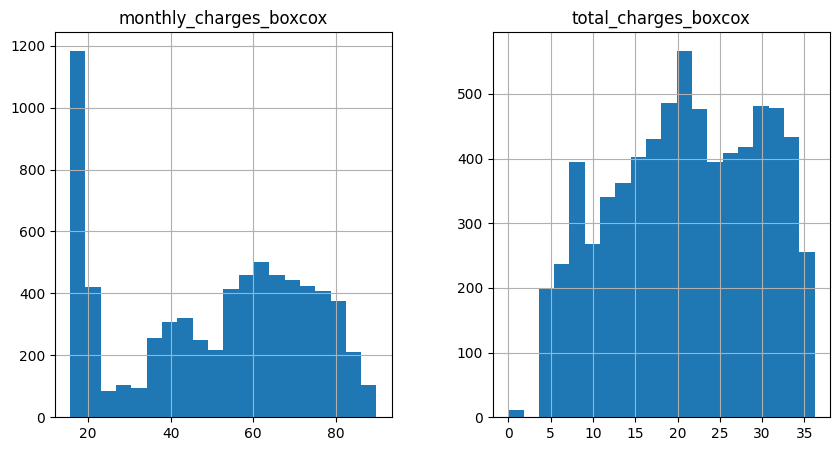

In [70]:
from scipy import stats

# Box-Cox transformation requires strictly positive values
df["monthly_charges_boxcox"], _ = stats.boxcox(df["monthly_charges"] + 1)  # Adding 1 if the data has 0s
df["total_charges_boxcox"], _ = stats.boxcox(df["total_charges"] + 1)

# Check the distribution after Box-Cox transformation
df[["monthly_charges_boxcox", "total_charges_boxcox"]].hist(bins=20, figsize=(10, 5))


In [71]:
df3['monthly_charges'].describe()

count    7043.000000
mean        0.462803
std         0.299403
min         0.000000
25%         0.171642
50%         0.518408
75%         0.712438
max         1.000000
Name: monthly_charges, dtype: float64

In [72]:
from scipy.stats import shapiro

# Shapiro-Wilk test for monthly_charges_boxcox
stat, p_value = shapiro(df["monthly_charges_boxcox"])
print(f"Shapiro-Wilk test for Monthly Charges: Stat={stat}, p-value={p_value}")

# Shapiro-Wilk test for total_charges_boxcox
stat, p_value = shapiro(df["total_charges_boxcox"])
print(f"Shapiro-Wilk test for Total Charges: Stat={stat}, p-value={p_value}")


Shapiro-Wilk test for Monthly Charges: Stat=0.9178249805462722, p-value=4.846387016691799e-52
Shapiro-Wilk test for Total Charges: Stat=0.9661987048159016, p-value=1.0769853735034453e-37


- The Shapiro-Wilk test results indicate that both the monthly_charges_boxcox and total_charges_boxcox distributions are not normal based on the very small p-values (both are significantly smaller than 0.05).
- Therefore, we will be going forward with tree based models and evalaute the performances. 

In [74]:
df3.drop(columns=['churn'], inplace=True)
df3.head(5)

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,tenure_bin,churn_encoded
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,1,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,2,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,2,1


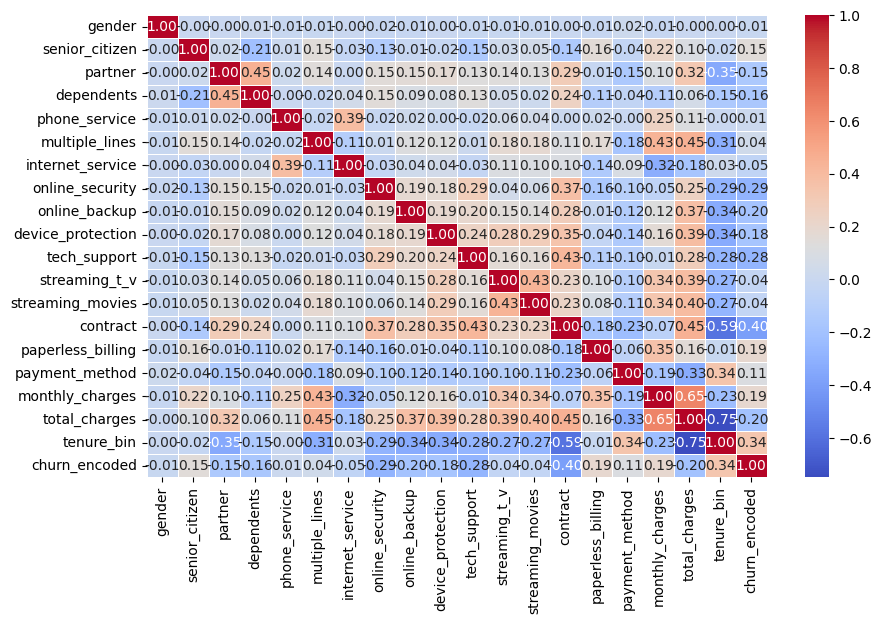

In [75]:
correlation_matrix = df3.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

- we will be doing feature selection with the help of Embeded model like Random Forest. 

In [77]:
df4=df3.copy()

In [78]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df4.drop(columns=['churn_encoded'])  # Dropping 'churn'
y = df4['churn_encoded']

In [79]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 5.6 Feature Selection (using Random Forest for feature importance)

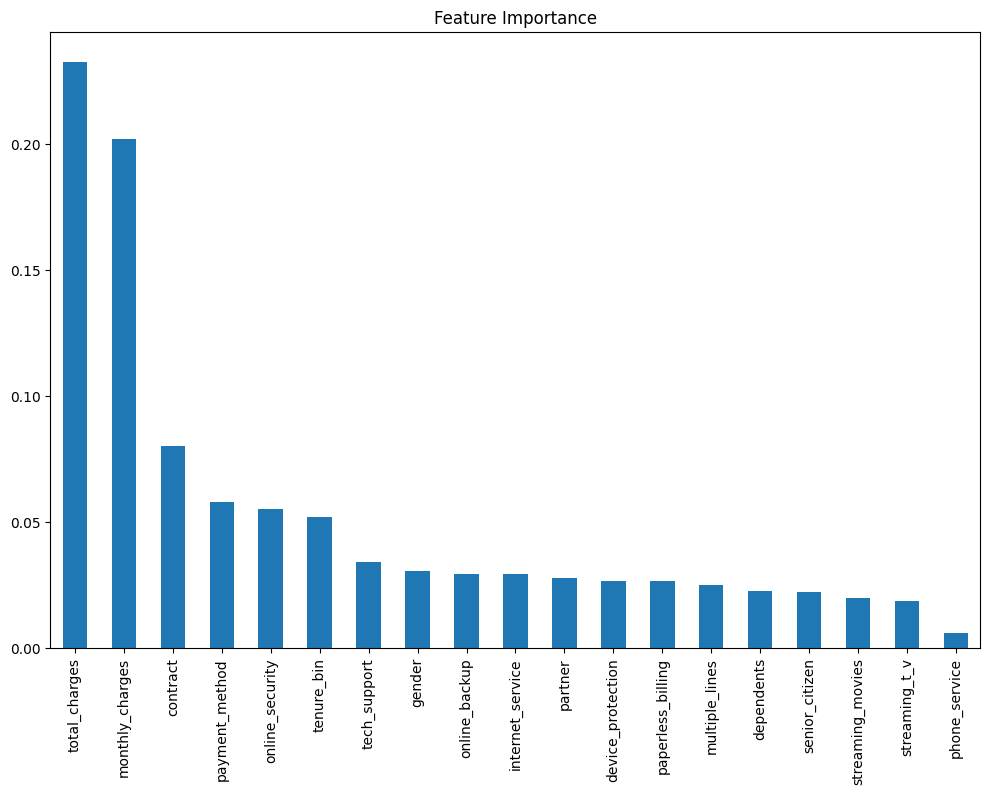

Top Features: Index(['total_charges', 'monthly_charges', 'contract', 'payment_method',
       'online_security'],
      dtype='object')


In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

# Select the top N features (e.g., top 5)
top_features = feature_importance.head(5).index
print("Top Features:", top_features)

# Subset the data with the top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

#### 6. Modeling

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
# defining the models in the iteration. 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [85]:
evaluation_results = {}

In [86]:
# Iterate through the models and train & evaluate each
for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...")
    
    # Fit the model on the selected features
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Get evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results in the dictionary
    evaluation_results[model_name] = {
        'classification_report': report,
        'confusion_matrix': cm
    }

    # Print classification report and confusion matrix
    print(f"Classification Report for {model_name}:")
    print(report)
    
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n" + "-"*50)


Training and Evaluating Logistic Regression...
Classification Report for Logistic Regression:
{'0': {'precision': 0.8314199395770393, 'recall': 0.894087069525666, 'f1-score': 0.8616155291170946, 'support': 1539.0}, '1': {'precision': 0.6441048034934498, 'recall': 0.5139372822299652, 'f1-score': 0.5717054263565892, 'support': 574.0}, 'accuracy': 0.7908187411263606, 'macro avg': {'precision': 0.7377623715352446, 'recall': 0.7040121758778155, 'f1-score': 0.7166604777368419, 'support': 2113.0}, 'weighted avg': {'precision': 0.7805354681563198, 'recall': 0.7908187411263606, 'f1-score': 0.7828609626312781, 'support': 2113.0}}
Confusion Matrix for Logistic Regression:
[[1376  163]
 [ 279  295]]

--------------------------------------------------
Training and Evaluating Decision Tree...
Classification Report for Decision Tree:
{'0': {'precision': 0.8101673101673101, 'recall': 0.8180636777128005, 'f1-score': 0.8140963465890722, 'support': 1539.0}, '1': {'precision': 0.4991055456171735, 'recall'

In [87]:
report = pd.DataFrame({
    model_name: eval_res['classification_report']['accuracy']
    for model_name, eval_res in evaluation_results.items()
}, index=['Accuracy'])

# You can expand the above DataFrame to include precision, recall, and F1-score
report

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.790819,0.727875,0.776148,0.78372


#### Classification Report:
##### Logistic Regression:
- Precision (Class 0): 0.8314
- Recall (Class 1): 0.5139
- F1-Score: 0.5717 (for Class 1)
- Confusion Matrix:
- True Positives (Class 1): 295
- False Negatives (Class 1): 279

##### Decision Tree:
- Precision (Class 0): 0.8102
- Recall (Class 1): 0.4861
- F1-Score: 0.4925 (for Class 1)
- Confusion Matrix:
- True Positives (Class 1): 279
- False Negatives (Class 1): 295

##### Random Forest:
- Precision (Class 0): 0.8192
- Recall (Class 1): 0.4739
- F1-Score: 0.5349 (for Class 1)
- Confusion Matrix:
- True Positives (Class 1): 272
- False Negatives (Class 1): 302

##### XGBoost:
- Precision (Class 0): 0.8287
- Recall (Class 1): 0.5087
- F1-Score: 0.5610 (for Class 1)
- Confusion Matrix:
- True Positives (Class 1): 292
- False Negatives (Class 1): 282

##### Insights:
- Logistic Regression is the best-performing model in terms of accuracy (79.08%), with a balanced performance in precision and recall for Class 0. However, the recall for Class 1 is still relatively low, indicating that it struggles to detect positive churn cases.

- Decision Tree performs the worst with an accuracy of 72.79%. The recall for Class 1 is also lower compared to other models, which means it misses many of the positive churn cases. The precision for Class 1 is not high either.

- Random Forest is a strong model but does not perform as well as Logistic Regression in terms of accuracy. Recall for Class 1 is low (47.39%), suggesting it's not good at detecting positive churn cases.

- XGBoost shows similar results to Random Forest with an accuracy of 78.37%. Recall for Class 1 is a little better than Random Forest, but still not optimal.

##### Next Steps:
- The class imbaance could be lowered with SMOTE technique for sampling in the churn feature during the training of the model.
- Performing Hyperparameter tuning with GridsearchCV or RandomaziedSearchCV to find best parameters to train the models.
- model interseption with the help of AUC-ROC curve to see how each model perfromed under different thresholds. 

#### 6.1 Hyperprarmeter Tuning and Handling class imbalance

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# hyperparameter grid for XGBoost
param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

# Applying the RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
random_search_xgb.fit(X_train, y_train)

# Getting the best parameters from the random search
best_params = random_search_xgb.best_params_
print("Best parameters found: ", best_params)

# Using the best parameters to train the final model
xgb_best = XGBClassifier(**best_params)

# Fitting the model to the training data
xgb_best.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_best.predict(X_test)

# Evaluating the model's performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy:  0.7946048272598202
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.66      0.50      0.57       574

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
 [[1393  146]
 [ 288  286]]


#### 7. Evaluation

Training and Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.747278750591576
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1539
           1       0.52      0.80      0.63       574

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

Confusion Matrix for Logistic Regression:
[[1122  417]
 [ 117  457]]

--------------------------------------------------
Training and Evaluating Decision Tree...
Accuracy for Decision Tree: 0.7136772361571225
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1539
           1       0.48      0.58      0.52       574

    accuracy                           0.71      2113
   macro avg       0.65      0.67      0.66      2113
weigh

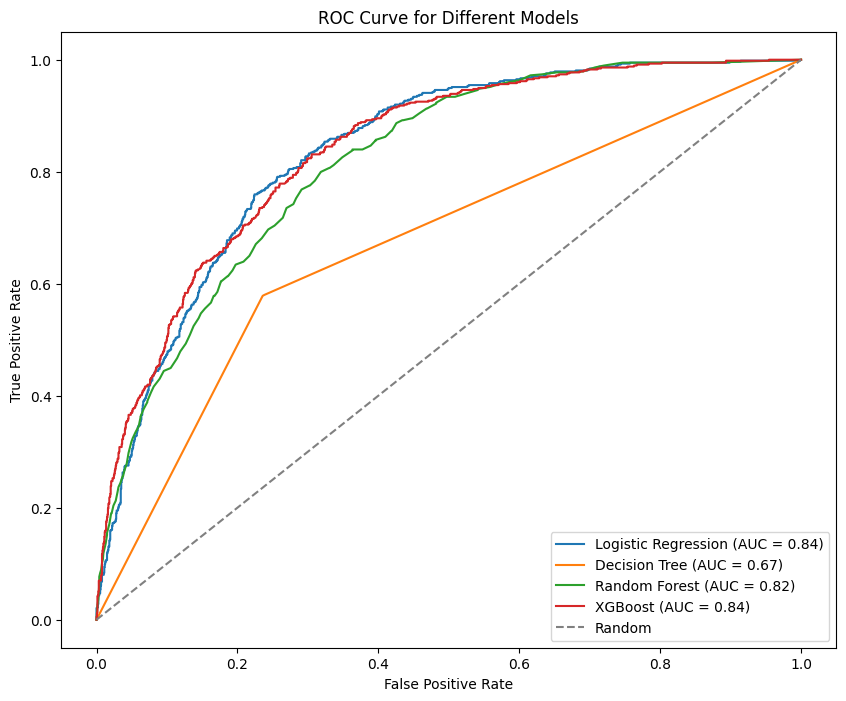

In [163]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix


# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(subsample=1, n_estimators=200, max_depth=3, learning_rate=0.1, colsample_bytree=0.8)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...")

    # Train the model on the resampled dataset
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")

    # Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print("\n" + "-"*50)


# Function to plot ROC curves for each model
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        # Get predicted probabilities
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (churn)
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    
    # Plot the diagonal line (chance level)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Different Models')
    plt.legend(loc='lower right')
    
    plt.show()

# Call the function to plot ROC curves
plot_roc_curve(models, X_test, y_test)

#### Key Observations:

##### 1. Recall for Class 1 (Churn):

- Logistic Regression: Recall for Class 1 (Churn) has significantly improved to 0.80, compared to what it was before. This is a good sign that the model is correctly identifying more churn instances after SMOTE.
- Decision Tree: Recall is 0.57, which is lower than Logistic Regression but still an improvement.
- Random Forest: Recall is 0.63, showing improvement as well, and is better than Decision Tree.
- XGBoost: Recall is 0.76, showing strong performance and similar to Logistic Regression.

##### 2. Accuracy:
- While accuracy has improved slightly in all models, it's still not very high, which is common in imbalanced datasets even after applying SMOTE. For these types of tasks, recall and precision are more important metrics than accuracy, especially for the minority class (churn).

##### 3. Precision for Churn (Class 1):
- The precision is lower for most models. This means that while these models are better at identifying churn (due to higher recall), they still have a high number of false positives.

##### Confusion Matrix:
- The Confusion Matrix confirms the improved recall for churners, as seen by the higher true positives (TP) and relatively fewer false negatives (FN) after applying SMOTE.

##### AUC value ranges:
- AUC = 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor predictive power.
- 0.7 < AUC < 0.8: The model has acceptable performance.
- 0.8 < AUC < 0.9: The model has good performance.
- AUC ≥ 0.9: The model has excellent predictive power.